### **Teena Bokde**
**Data Science - Batch Oct 2024 (Pune) - Assignment 6**
### **MLR**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso

In [16]:
df = pd.read_csv('/content/ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


**Observation**

Good Thing ! There are no missing values in the dataframe

In [5]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


**Visualization**

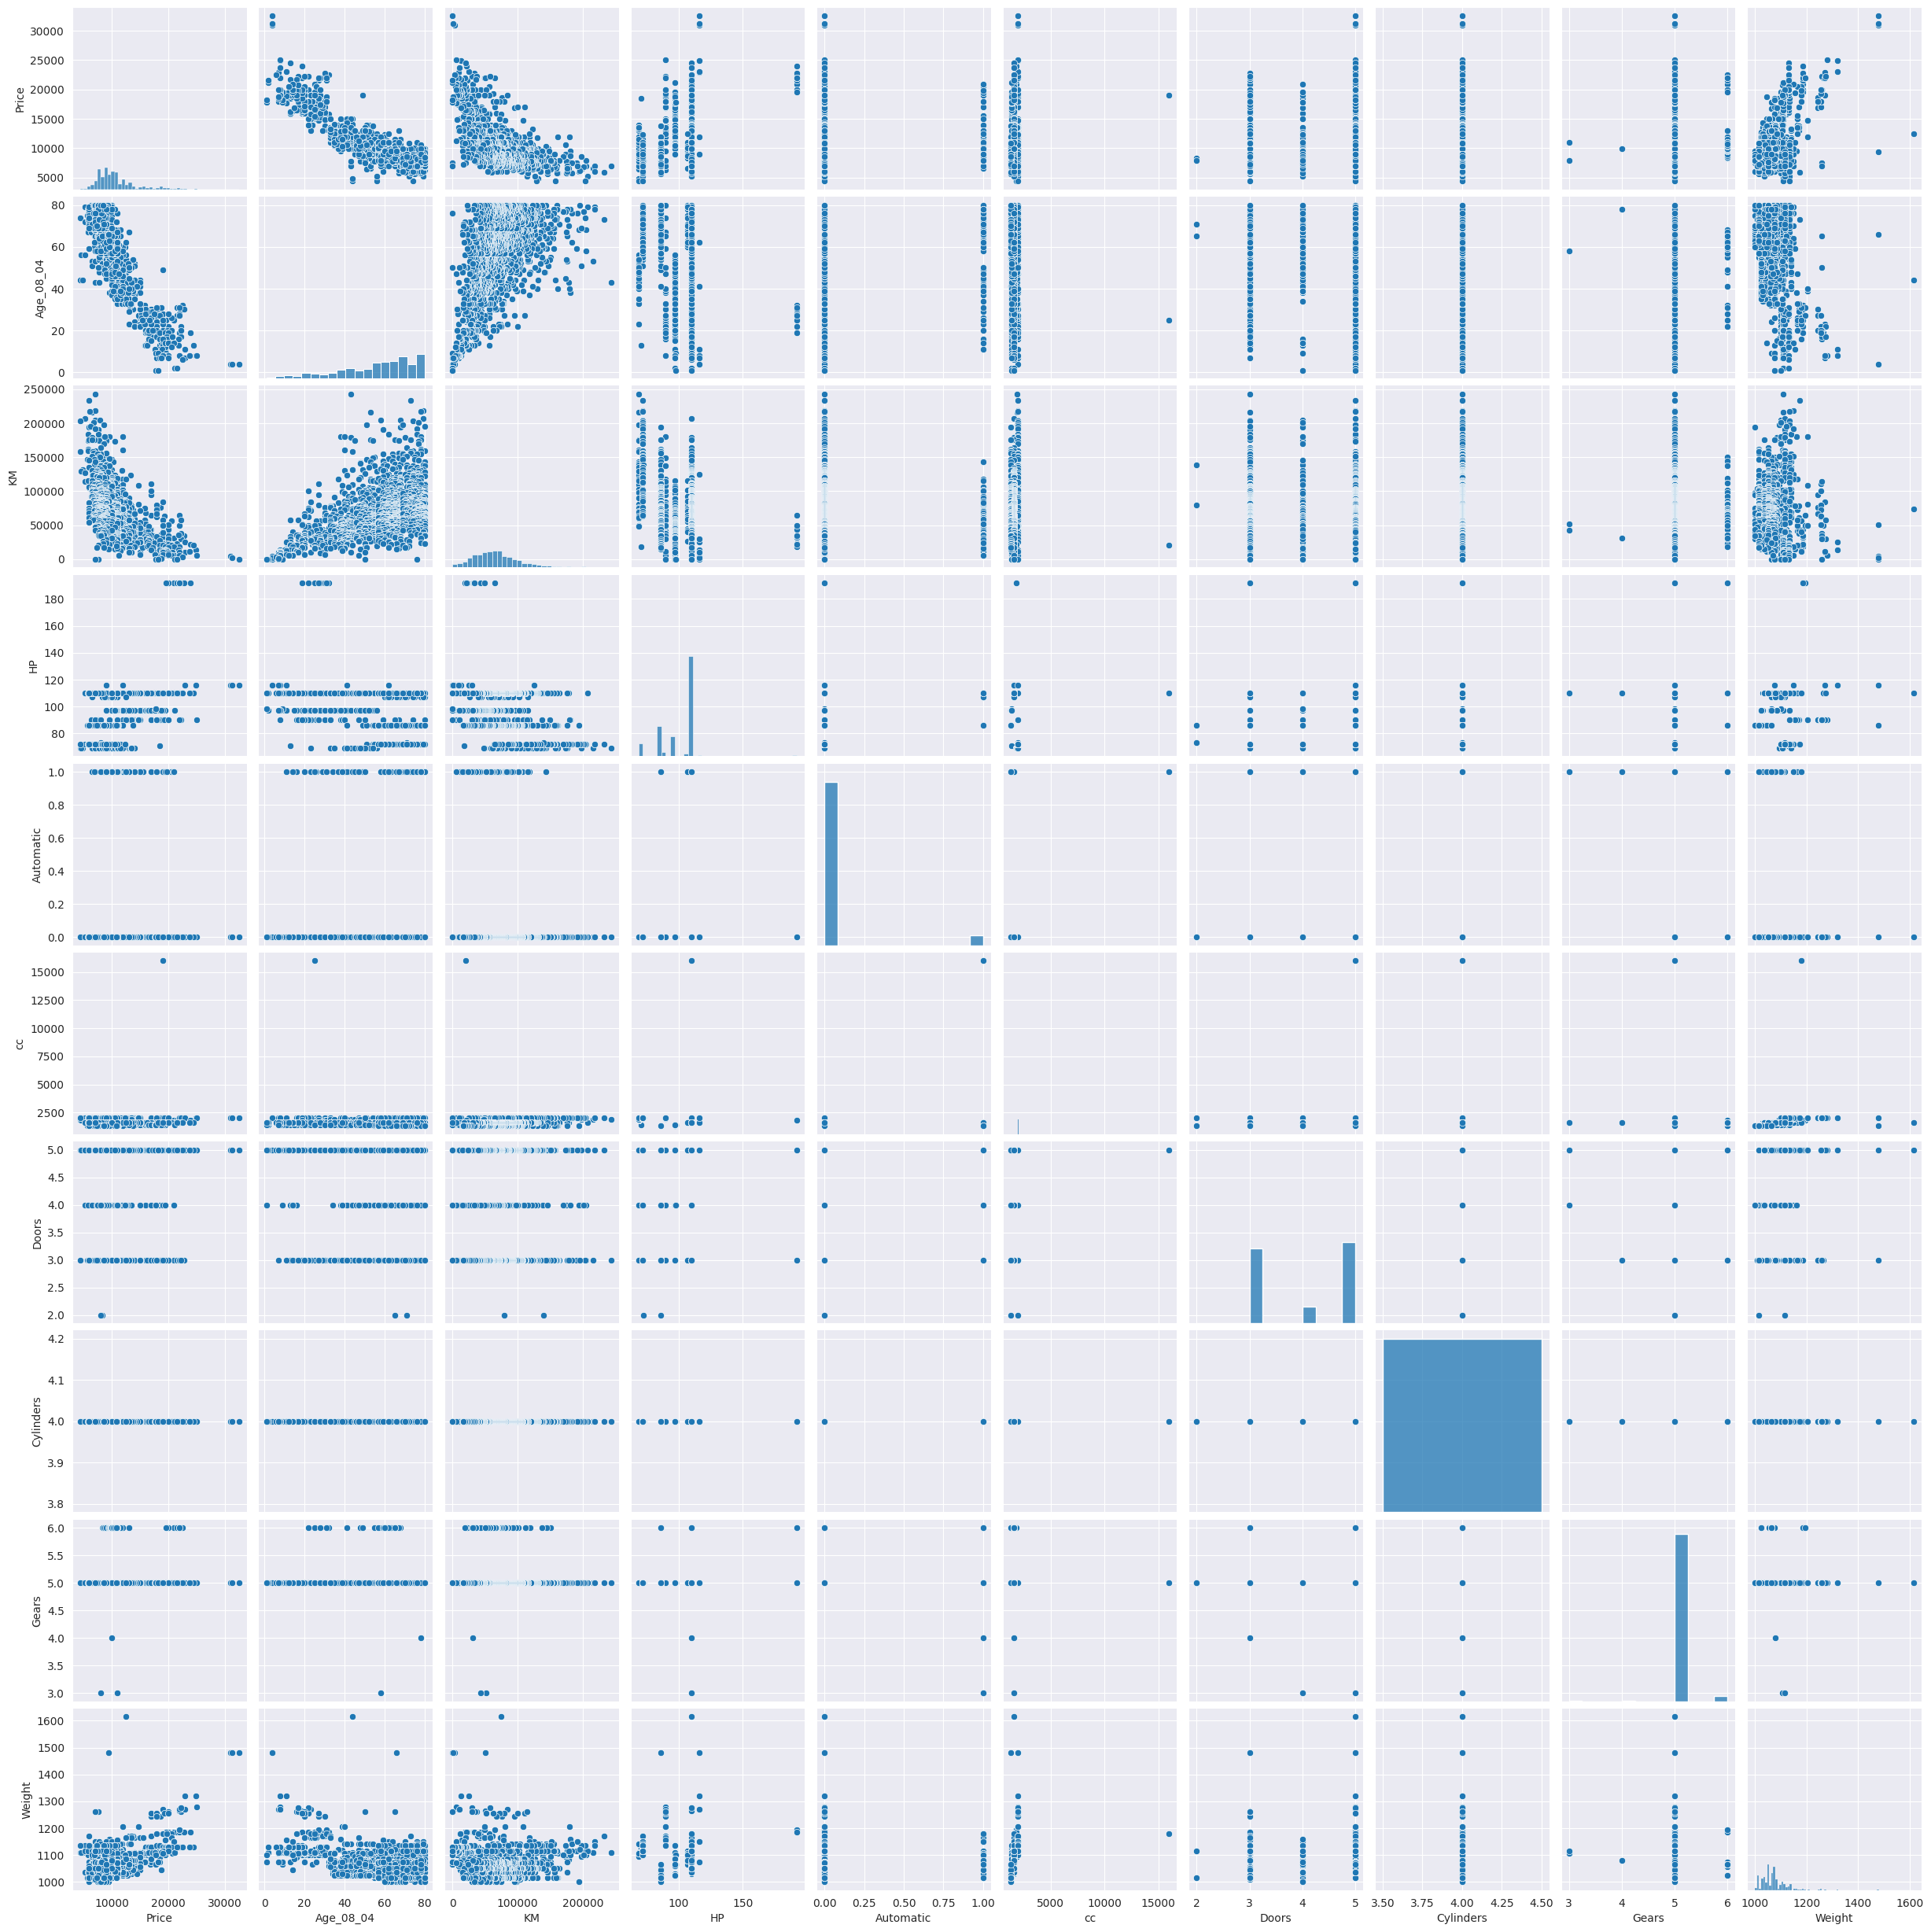

In [6]:
sns.set_style(style='darkgrid')
sns.pairplot(df)
plt.show()

In [7]:
# Analysing outliers in numerical variables using box plots
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(numeric_cols)

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')


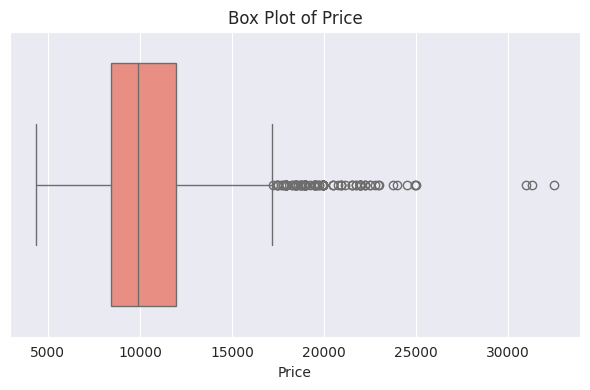

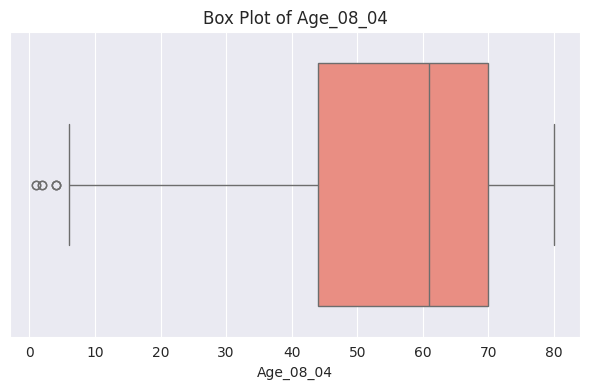

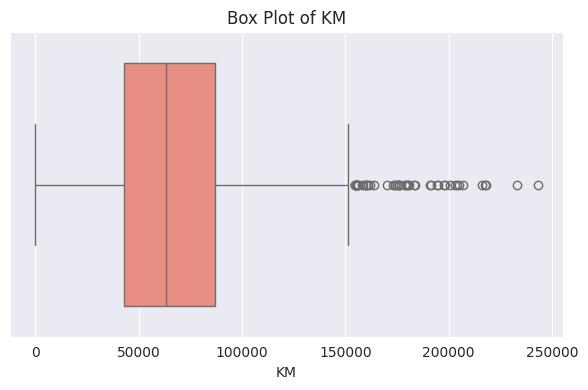

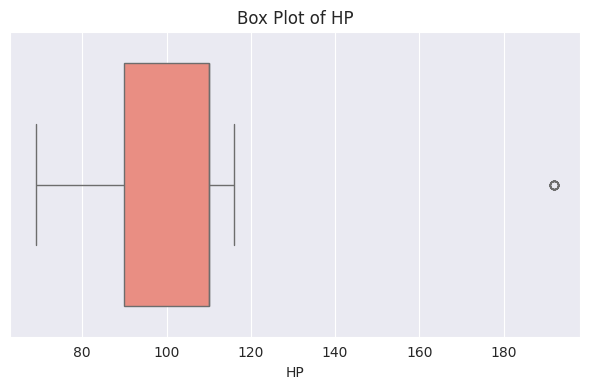

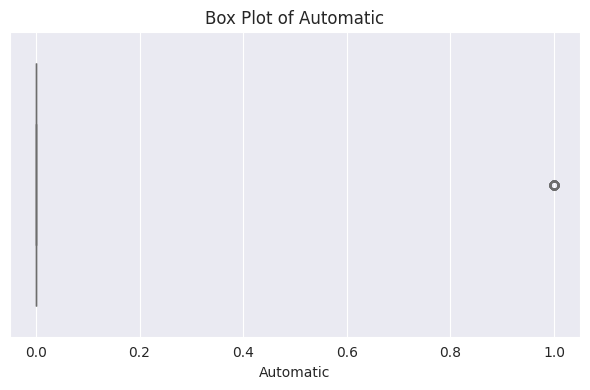

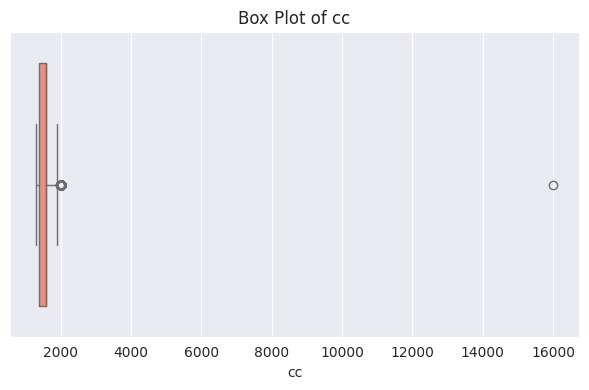

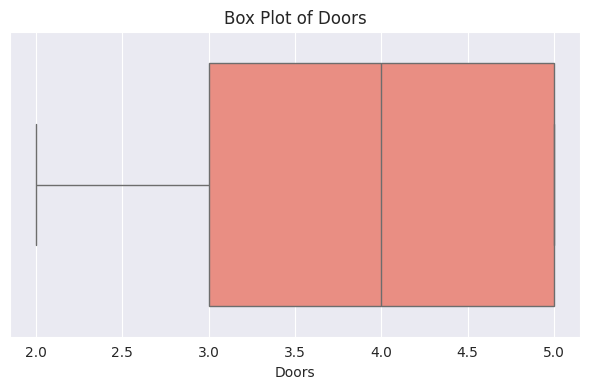

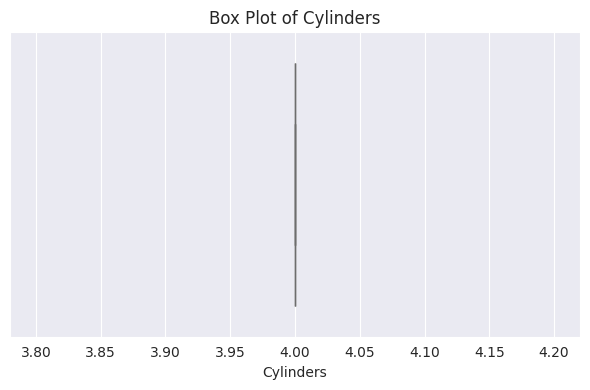

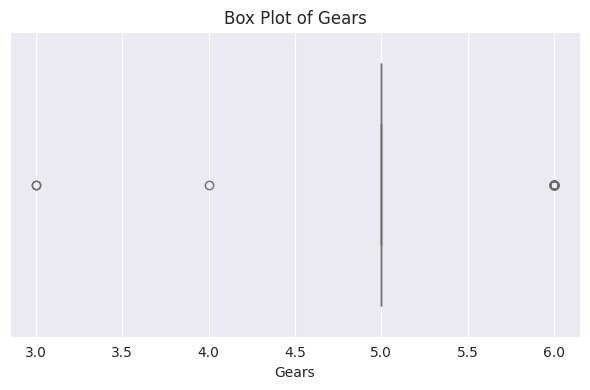

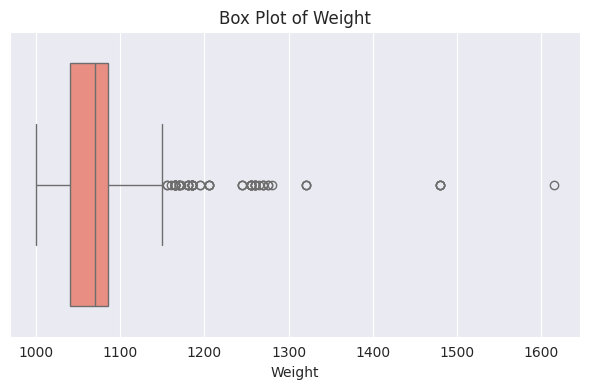

In [8]:
# Before removing outliers
def plot_boxplot(data, column):
    plt.figure(figsize=(6, 4))

    # Box plot
    sns.boxplot(x=data[column], color='salmon')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

# Plot box plot for each numeric column one by one
for col in numeric_cols:
    plot_boxplot(df, col)

In [10]:
# Remove outliers of present

# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number])

Q1 = numerical_cols.quantile(0.25)
print(f'Q1:\n{Q1}')
Q3 = numerical_cols.quantile(0.75)
print(f'\nQ3:\n{Q3}')
IQR = Q3 - Q1
print(f'\nIQR:\n{IQR}')

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
print(f'\nLower Bound:\n{lower_bound}')
upper_bound = Q3 + 1.5 * IQR
print(f'\nUpper Bound:\n{upper_bound}\n')

# Outliers
outliers = {}
for col in numerical_cols.columns:
    numerical_col_outliers = numerical_cols[(numerical_cols[col] < lower_bound[col]) | (numerical_cols[col] > upper_bound[col])]
    if not numerical_col_outliers.empty:
        outliers[col] = numerical_col_outliers[col]
        print(f"Outlier(s) in column '{col}':")
        print(numerical_col_outliers)
    else:
        print(f"No outliers in column '{col}'")

# Remove outliers
numerical_cols_no_outliers = numerical_cols[(numerical_cols >= lower_bound) & (numerical_cols <= upper_bound)].dropna().reset_index(drop=True)
print("\nNo outliers:")
print(numerical_cols_no_outliers)

# Re-assigning to new variable
new_df = numerical_cols_no_outliers
new_df.head()

Q1:
Price         8450.0
Age_08_04       44.0
KM           43000.0
HP              90.0
Automatic        0.0
cc            1400.0
Doors            3.0
Cylinders        4.0
Gears            5.0
Weight        1040.0
Name: 0.25, dtype: float64

Q3:
Price        11950.00
Age_08_04       70.00
KM           87020.75
HP             110.00
Automatic        0.00
cc            1600.00
Doors            5.00
Cylinders        4.00
Gears            5.00
Weight        1085.00
Name: 0.75, dtype: float64

IQR:
Price         3500.00
Age_08_04       26.00
KM           44020.75
HP              20.00
Automatic        0.00
cc             200.00
Doors            2.00
Cylinders        0.00
Gears            0.00
Weight          45.00
dtype: float64

Lower Bound:
Price         3200.000
Age_08_04        5.000
KM          -23031.125
HP              60.000
Automatic        0.000
cc            1100.000
Doors            0.000
Cylinders        4.000
Gears            5.000
Weight         972.500
dtype: float64

Upper 

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,12950.0,23.0,71138.0,69.0,0.0,1900.0,3,4,5.0,1105.0
1,16750.0,24.0,25563.0,110.0,0.0,1600.0,3,4,5.0,1065.0
2,16950.0,30.0,64359.0,110.0,0.0,1600.0,3,4,5.0,1105.0
3,15950.0,30.0,67660.0,110.0,0.0,1600.0,3,4,5.0,1105.0
4,15950.0,28.0,56349.0,110.0,0.0,1600.0,3,4,5.0,1120.0


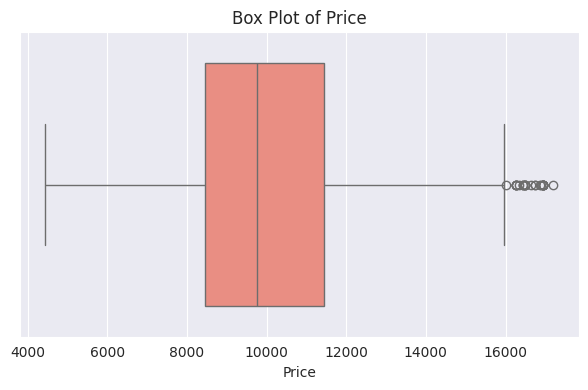

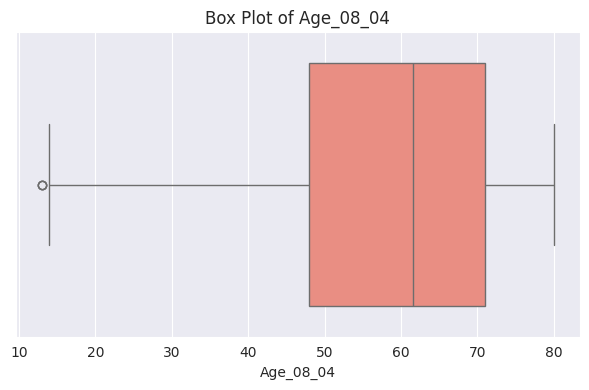

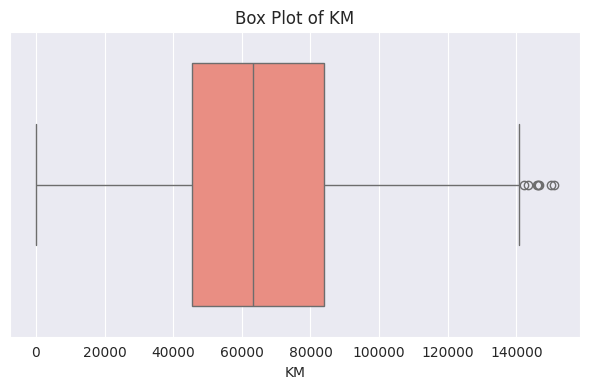

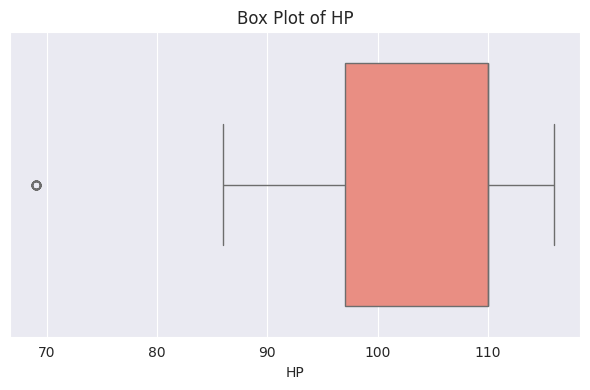

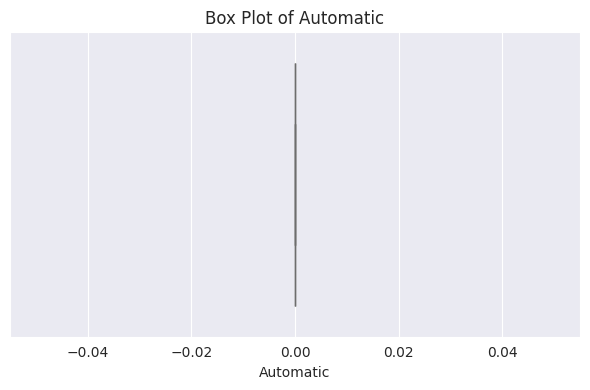

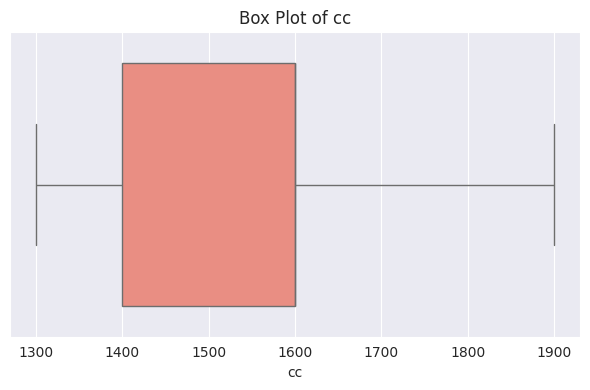

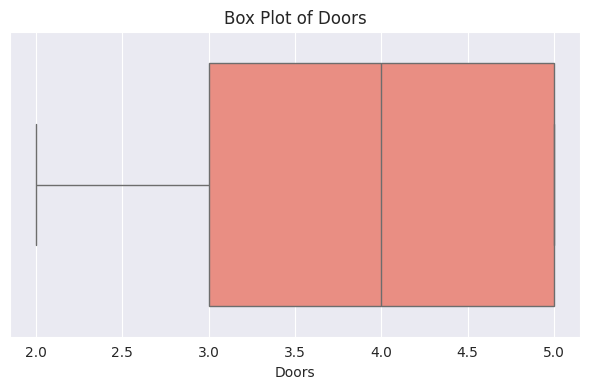

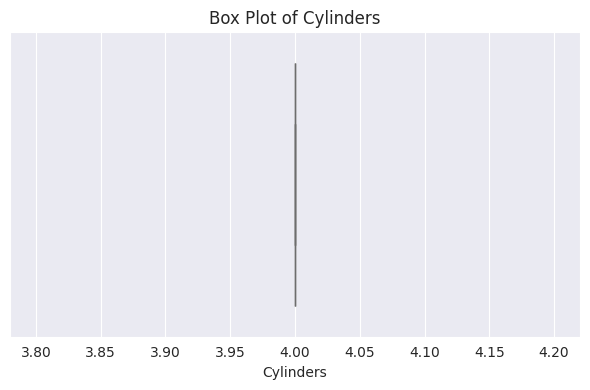

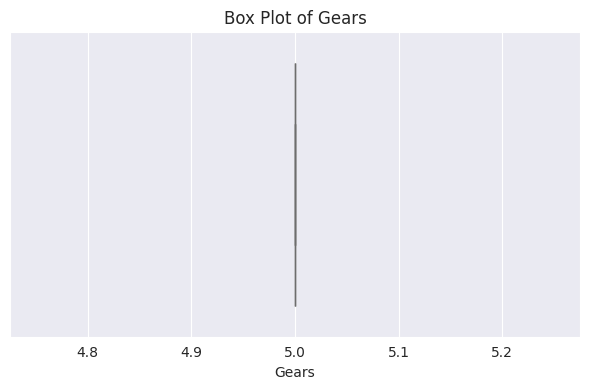

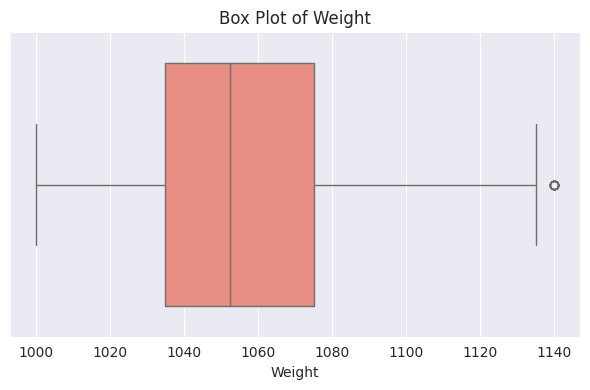

In [11]:
# Before removing outliers
def plot_boxplot(data, column):
    plt.figure(figsize=(6, 4))

    # Box plot
    sns.boxplot(x=data[column], color='salmon')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

# Plot box plot for each numeric column one by one
for col in numeric_cols:
    plot_boxplot(new_df, col)

In [12]:
new_df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,12950.0,23.0,71138.0,69.0,0.0,1900.0,3,4,5.0,1105.0
1,16750.0,24.0,25563.0,110.0,0.0,1600.0,3,4,5.0,1065.0
2,16950.0,30.0,64359.0,110.0,0.0,1600.0,3,4,5.0,1105.0
3,15950.0,30.0,67660.0,110.0,0.0,1600.0,3,4,5.0,1105.0
4,15950.0,28.0,56349.0,110.0,0.0,1600.0,3,4,5.0,1120.0


In [13]:
# Merge the dataframes on the 'ID' column
new_df = pd.merge(new_df, df[['Price', 'Fuel_Type']], on='Price', how='left')
new_df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type
0,12950.0,23.0,71138.0,69.0,0.0,1900.0,3,4,5.0,1105.0,Diesel
1,12950.0,23.0,71138.0,69.0,0.0,1900.0,3,4,5.0,1105.0,Diesel
2,12950.0,23.0,71138.0,69.0,0.0,1900.0,3,4,5.0,1105.0,Petrol
3,12950.0,23.0,71138.0,69.0,0.0,1900.0,3,4,5.0,1105.0,Diesel
4,12950.0,23.0,71138.0,69.0,0.0,1900.0,3,4,5.0,1105.0,Petrol
...,...,...,...,...,...,...,...,...,...,...,...
37396,6950.0,76.0,1.0,110.0,0.0,1600.0,5,4,5.0,1114.0,Petrol
37397,6950.0,76.0,1.0,110.0,0.0,1600.0,5,4,5.0,1114.0,Petrol
37398,6950.0,76.0,1.0,110.0,0.0,1600.0,5,4,5.0,1114.0,Petrol
37399,6950.0,76.0,1.0,110.0,0.0,1600.0,5,4,5.0,1114.0,Petrol


In [14]:
# Relocating the 'Total' column
cols = list(new_df.columns)
new_df = new_df[cols[0:3] + [cols[-1]] + cols[3:-1]]  # 1st 4 columns + 'Total' column + rest of the columns except the last
new_df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,12950.0,23.0,71138.0,Diesel,69.0,0.0,1900.0,3,4,5.0,1105.0
1,12950.0,23.0,71138.0,Diesel,69.0,0.0,1900.0,3,4,5.0,1105.0
2,12950.0,23.0,71138.0,Petrol,69.0,0.0,1900.0,3,4,5.0,1105.0
3,12950.0,23.0,71138.0,Diesel,69.0,0.0,1900.0,3,4,5.0,1105.0
4,12950.0,23.0,71138.0,Petrol,69.0,0.0,1900.0,3,4,5.0,1105.0


In [17]:
# Splitting up the dataset into Features and Target variables
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [18]:
# Display Features
print(X[[1]])

[[23 72937 'Diesel' 90 0 2000 3 4 5 1165]]


In [19]:
# Encoding categorical data
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X[[1]])

[[0.0 1.0 0.0 23 72937 90 0 2000 3 4 5 1165]]


In [20]:
# Display Target
print(y)


[13500 13750 13950 ...  8500  7250  6950]


### **Building Three Models**

In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [22]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
print(X_train)

[[-0.10702217  2.98270879 -2.81055596 ...  0.         -0.14062165
   1.29555763]
 [-0.10702217 -0.33526572  0.35580149 ...  0.         -0.14062165
   0.24993041]
 [-0.10702217 -0.33526572  0.35580149 ...  0.         -0.14062165
  -1.36603893]
 ...
 [-0.10702217 -0.33526572  0.35580149 ...  0.         -0.14062165
  -0.41546873]
 [-0.10702217 -0.33526572  0.35580149 ...  0.         -0.14062165
   0.05981637]
 [-0.10702217 -0.33526572  0.35580149 ...  0.         -0.14062165
  -1.08086787]]


In [24]:
print(X_test)

[[-0.10702217 -0.33526572  0.35580149 ...  0.         -0.14062165
  -0.22535469]
 [-0.10702217 -0.33526572  0.35580149 ...  0.         -0.14062165
   0.05981637]
 [-0.10702217 -0.33526572  0.35580149 ...  0.         -0.14062165
   0.05981637]
 ...
 [-0.10702217 -0.33526572  0.35580149 ...  0.         -0.14062165
   0.72521551]
 [-0.10702217 -0.33526572  0.35580149 ...  0.         -0.14062165
  -0.41546873]
 [-0.10702217 -0.33526572  0.35580149 ...  0.         -0.14062165
  -1.08086787]]


### **1. Model with all the features**

In [25]:
# Create and train the model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Make predictions
y_pred1 = model1.predict(X_test)

np.set_printoptions(precision=2)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[ 12070.73  10900.  ]
 [ 11071.73  10895.  ]
 [ 13893.48  10750.  ]
 [  6343.17   6500.  ]
 [ 12475.36  11895.  ]
 [ 17709.17  17950.  ]
 [  7630.17   7000.  ]
 [  9928.98   8400.  ]
 [  7129.67   7250.  ]
 [ 11828.67  12950.  ]
 [  9688.67   8745.  ]
 [  9825.23   9450.  ]
 [  7542.17   7499.  ]
 [  8830.29   9950.  ]
 [  6769.29   8500.  ]
 [  8243.29   7750.  ]
 [  6115.36   8950.  ]
 [  7192.17   8250.  ]
 [ 17081.79  17450.  ]
 [  5868.11   6550.  ]
 [ 16341.98  14950.  ]
 [  7060.04   7950.  ]
 [  9282.86   7950.  ]
 [  6674.73   5740.  ]
 [ 13079.86  13750.  ]
 [ 18606.17  22250.  ]
 [  7959.86   6950.  ]
 [ 10491.98  10950.  ]
 [-37976.96  18950.  ]
 [ 10593.17   9250.  ]
 [  7898.86   9250.  ]
 [  8551.73   9450.  ]
 [ 13432.23  10500.  ]
 [ 16876.61  17950.  ]
 [ 26794.17  31275.  ]
 [ 10172.29   8850.  ]
 [ 10744.17   9950.  ]
 [  7876.79   9900.  ]
 [  9259.67   9500.  ]
 [ 16702.17  16450.  ]
 [ 12075.48  11950.  ]
 [  9050.92   8250.  ]
 [  8374.17   7400.  ]
 [ 10360.67

In [27]:
# Evaluate the model
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

print(f'Model 1 - MSE: {mse1}, R2: {r2_1}')

Model 1 - MSE: 12829536.496802717, R2: 0.08924385883165342


### **2. Model with Selected Features (Age, KM, HP, Weight, and Quarterly_Tax)**

In [28]:
# Select subset of features
X_selected = X[:, [3,4,5,7,11]]
X_selected

array([[23, 46986, 90, 2000, 1165],
       [23, 72937, 90, 2000, 1165],
       [24, 41711, 90, 2000, 1165],
       ...,
       [71, 17016, 86, 1300, 1015],
       [70, 16916, 86, 1300, 1015],
       [76, 1, 110, 1600, 1114]], dtype=object)

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=1)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create and train the model
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Make predictions
y_pred2 = model2.predict(X_test)

# Evaluate the model
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print(f'Model 2 - MSE: {mse2}, R2: {r2_2}')

Model 2 - MSE: 3159850.9297984755, R2: 0.7756852992929504


### **3. Model with Polynomial Features (degree 2)**

In [30]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create and train the model
model3 = LinearRegression()
model3.fit(X_train, y_train)

# Make predictions
y_pred3 = model3.predict(X_test)

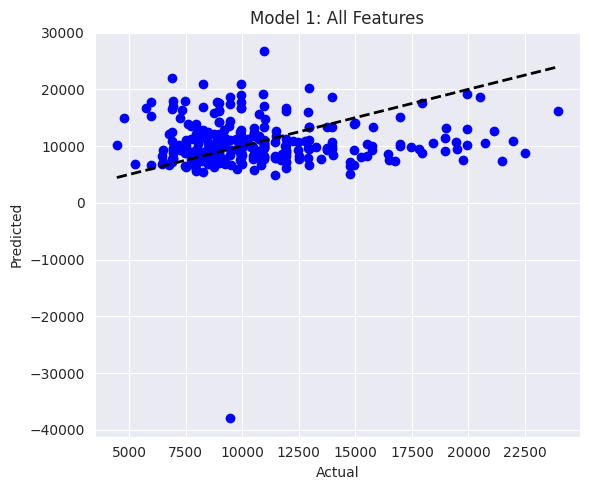

In [31]:
# Plotting model predictions vs actual values for 1st model

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred1, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Model 1: All Features')

plt.tight_layout()
plt.show()

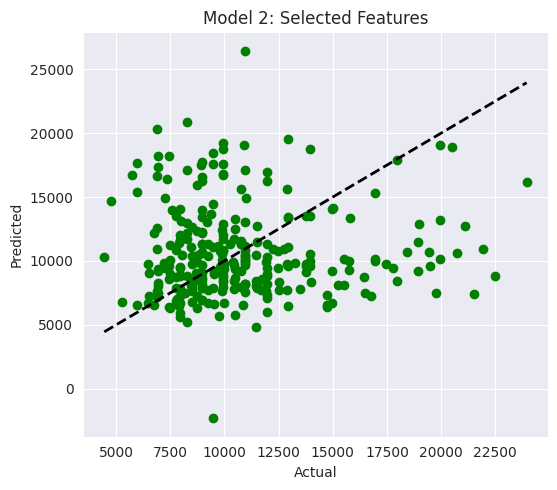

In [32]:
# Plotting model predictions vs actual values for 2nd model

plt.figure(figsize=(16,5))
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred2, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Model 2: Selected Features')
plt.tight_layout()
plt.show()

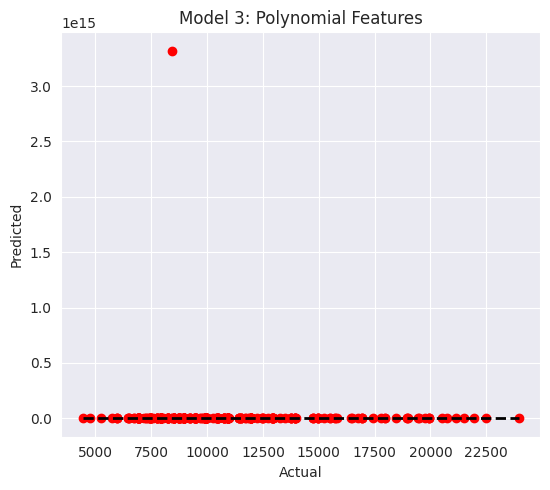

In [33]:
# Plotting model predictions vs actual values for 3rd model

plt.figure(figsize=(16,5))
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred3, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Model 3: Polynomial Features')
plt.tight_layout()
plt.show()

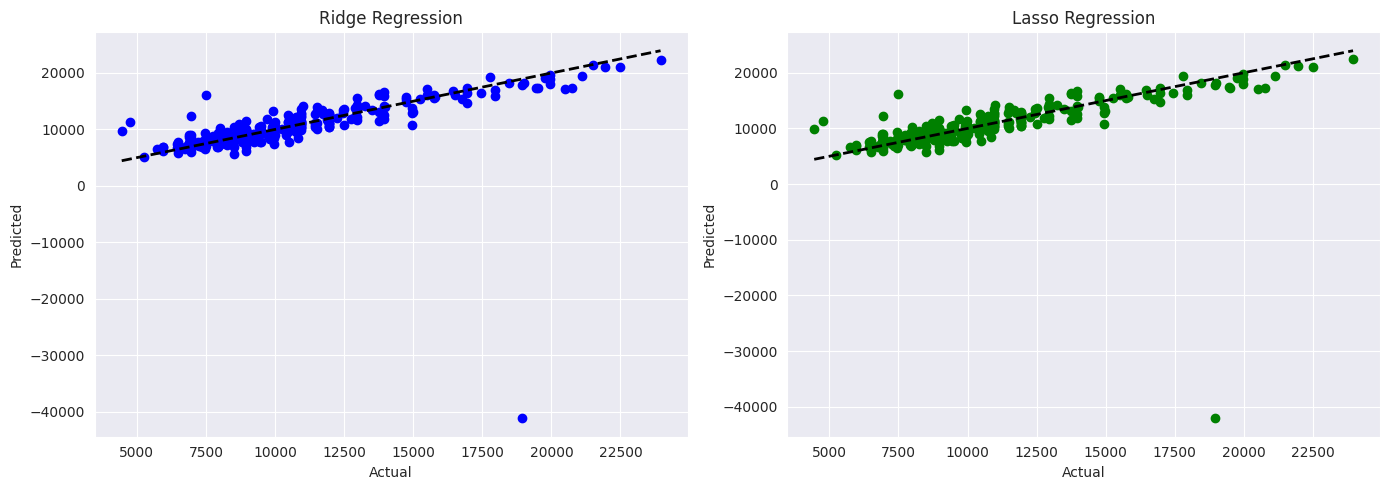

In [34]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

### Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Plotting the Results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression')

plt.tight_layout()
plt.show()